<a href="https://colab.research.google.com/github/Cheunji/aipython/blob/main/202205172_%EC%B5%9C%EC%9D%80%EC%A7%80_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**붓꽃 데이터 분석**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**붓꽃 데이터 읽어와서 확인하기**

In [3]:
# 1. 데이터 파일 읽어오기
iris_data = pd.read_csv("iris.csv")
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
# 2. 데이터의 기본 정보 출력
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# 3. 데이터의 기초 통계량 출력
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# 4. 품종별 개수 구하기
iris_data['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

**붓꽃 데이터 전처리**

In [7]:
# 1. 결측치 확인하기
iris_data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
# 2. 중복 데이터 확인하기

iris_data.duplicated().sum()

1

In [9]:
# 3. 중복 데이터 모두 확인하기

iris_data[iris_data.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
142,5.8,2.7,5.1,1.9,virginica


In [10]:
iris_data[iris_data.duplicated(keep=False)]

,sepal_length,sepal_width,petal_length,petal_width,species
101,5.8,2.7,5.1,1.9,virginica
142,5.8,2.7,5.1,1.9,virginica


In [11]:
# 4. 중복 데이터 삭제하기

iris_data.drop_duplicates(inplace=True)

In [12]:
# 붓꽃 데이터 그룹핑

# 1. 품종(species) 열을 기준으로 합계 구하기
iris_data.groupby('species').sum()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,323.6,146.0,272.5,99.4


In [13]:
# 2. 품종(species) 열을 기준으로 평균 구하기
iris_data.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006000,3.428000,1.462000,0.246000
versicolor,5.936000,2.770000,4.260000,1.326000
virginica,6.604082,2.979592,5.561224,2.028571


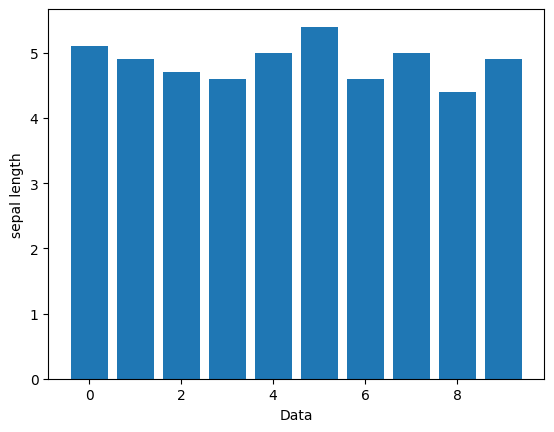

In [29]:
# 붓꽃 데이터 시각화

# 1. 막대 그래프 그리기
# 1-1. 꽃받침 길이의 시각화

# bar는 x와 y 둘다 지정하지 않으면 실행 X
plt.bar(iris_data[:10].index, iris_data['sepal_length'][:10])


plt.xlabel('Data')
plt.ylabel('sepal length')
plt.show()

<Axes: xlabel='species', ylabel='sepal_length'>

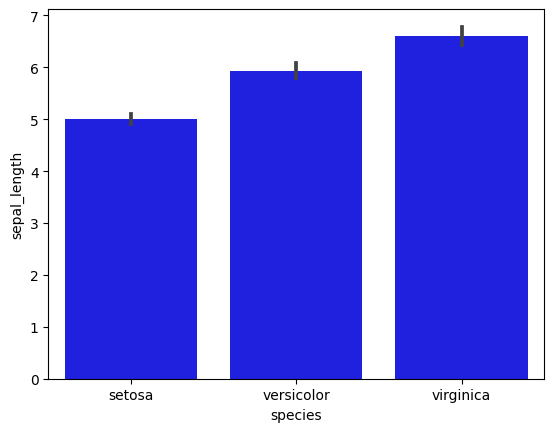

In [40]:
# 1-2. 붓꽃 종류별 꽃받침 길이의 평균에 대한 시각화

sns.barplot(x='species', y='sepal_length', data=iris_data, color='blue')

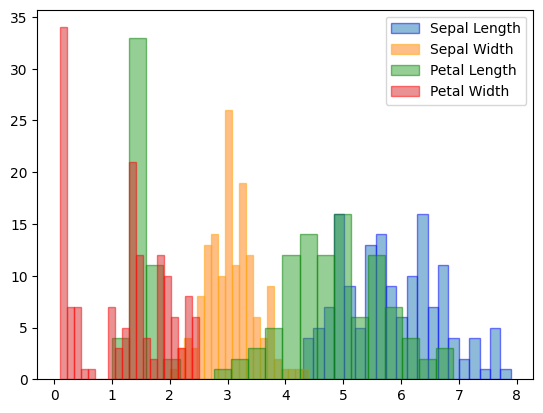

In [42]:
# 2. 히스토그램 그래프 그리기
# 각 특징(4가지) 값들의 빈도수에 대한 시각화
# 그래프가 다르게 나옴

plt.hist(iris_data['sepal_length'], bins=20, alpha=0.5, label='Sepal Length', edgecolor='blue')
plt.hist(iris_data['sepal_width'], bins=20, alpha=0.5, label='Sepal Width', edgecolor='orange')
plt.hist(iris_data['petal_length'], bins=20, alpha=0.5, label='Petal Length', edgecolor='green')
plt.hist(iris_data['petal_width'], bins=20, alpha=0.5, label='Petal Width', edgecolor='red')
plt.legend()
plt.show()

<Axes: xlabel='sepal_length', ylabel='petal_length'>

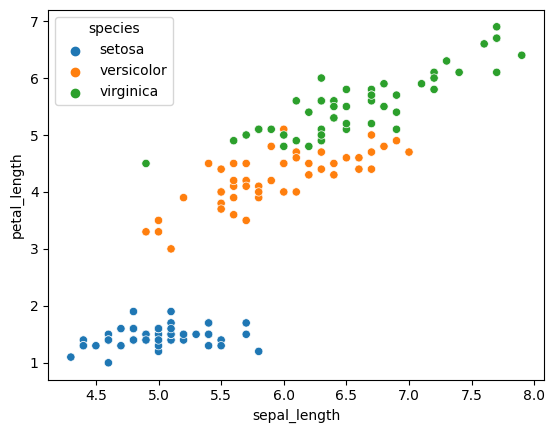

In [ ]:
# 3. 산점도 그래프 그리기
# 꽃받침의 길이와 꽃잎의 길이의 산점도를 시각화

sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=iris_data)